In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sub_df = pd.read_csv("sample_submission.csv")

In [3]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [4]:
corr_matrix = train_df.corr()

In [5]:
print(train_df[(train_df['LotFrontage']>300)].index)
print(train_df[(train_df['LotArea']>200000)].index)
print(train_df[(train_df['BsmtFinSF1']>5000)].index)
print(train_df[(train_df['TotalBsmtSF']>5000)].index)
print(train_df[(train_df['1stFlrSF']>4000)].index)
print(train_df[(train_df['GrLivArea']>4500)].index)
print(train_df[(train_df['EnclosedPorch']>500)].index)
print(train_df[(train_df['MiscVal']>2000)].index)

Int64Index([934, 1298], dtype='int64')
Int64Index([313], dtype='int64')
Int64Index([1298], dtype='int64')
Int64Index([1298], dtype='int64')
Int64Index([1298], dtype='int64')
Int64Index([523, 1298], dtype='int64')
Int64Index([197], dtype='int64')
Int64Index([346, 705, 1230, 1457], dtype='int64')


In [6]:
corr_matrix.sort_values(["SalePrice"], ascending=False )["SalePrice"]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

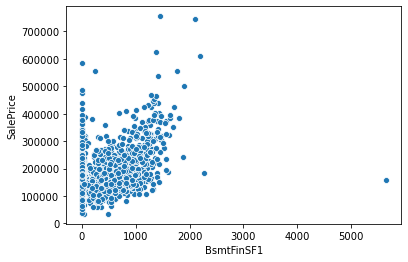

In [7]:
sns.scatterplot(x=train_df["BsmtFinSF1"], y=train_df["SalePrice"]) #5000

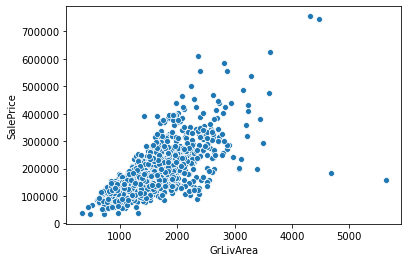

In [8]:
sns.scatterplot(x=train_df["GrLivArea"], y=train_df["SalePrice"]) #4000

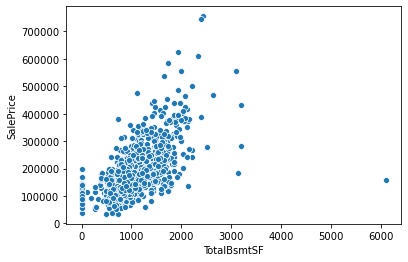

In [9]:
sns.scatterplot(x=train_df["TotalBsmtSF"], y=train_df["SalePrice"]) #5000

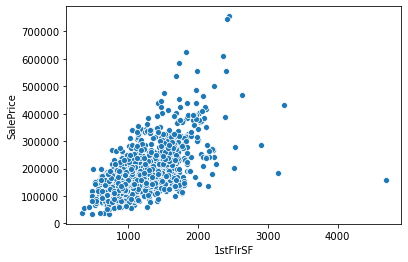

In [10]:
sns.scatterplot(x=train_df["1stFlrSF"], y=train_df["SalePrice"]) #4000 can be 3000 as well

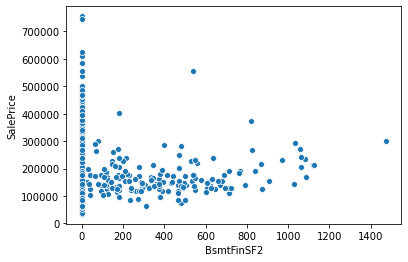

In [11]:
sns.scatterplot(x=train_df["BsmtFinSF2"], y=train_df["SalePrice"]) # 1400

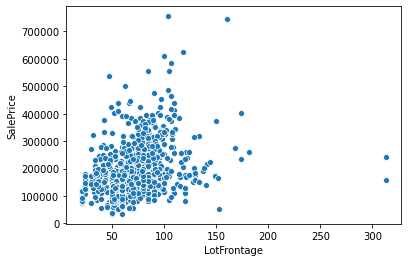

In [12]:
sns.scatterplot(x=train_df["LotFrontage"], y=train_df["SalePrice"]) # 250

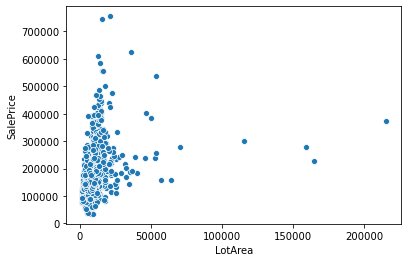

In [13]:
sns.scatterplot(x=train_df["LotArea"], y=train_df["SalePrice"]) # 100000

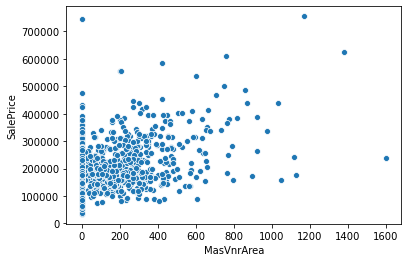

In [14]:
sns.scatterplot(x=train_df["MasVnrArea"], y=train_df["SalePrice"]) # 100000

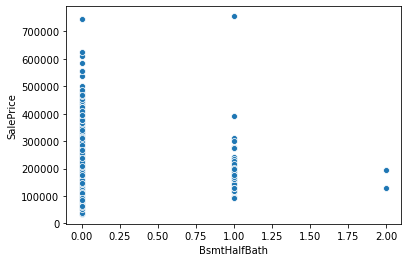

In [15]:
sns.scatterplot(x=train_df["BsmtHalfBath"], y=train_df["SalePrice"]) # 100000

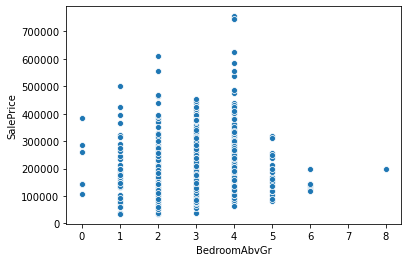

In [16]:
sns.scatterplot(x=train_df["BedroomAbvGr"], y=train_df["SalePrice"]) # 100000

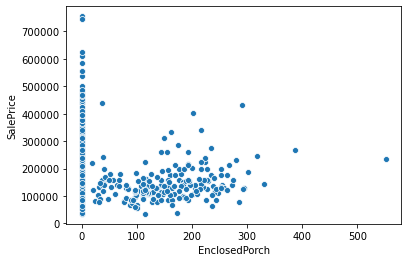

In [17]:
sns.scatterplot(x=train_df["EnclosedPorch"], y=train_df["SalePrice"]) # 100000

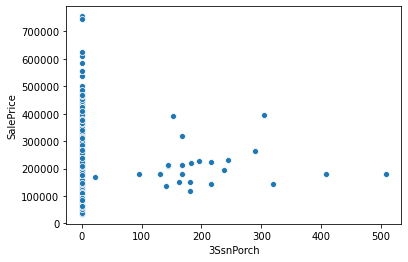

In [18]:
sns.scatterplot(x=train_df["3SsnPorch"], y=train_df["SalePrice"]) # 100000

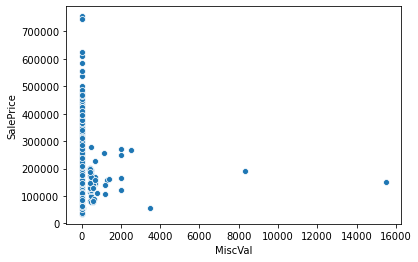

In [19]:
sns.scatterplot(x=train_df["MiscVal"], y=train_df["SalePrice"]) # 100000

In [20]:
print(train_df[train_df["BsmtFinSF1"]>5000].index)
print(train_df[train_df["GrLivArea"]>4000].index)
print(train_df[train_df["TotalBsmtSF"]>4000].index)
print(train_df[train_df["1stFlrSF"]>4000].index)
print(train_df[train_df["BsmtFinSF2"]>1300].index)
print(train_df[train_df["LotFrontage"]>250].index)
print(train_df[train_df["LotArea"]>200000].index)
print(train_df[train_df["BedroomAbvGr"]>7].index)
print(train_df[train_df["EnclosedPorch"]>500].index)
print(train_df[train_df["3SsnPorch"]>400].index)
print(train_df[train_df["MiscVal"]>7000].index)

Int64Index([1298], dtype='int64')
Int64Index([523, 691, 1182, 1298], dtype='int64')
Int64Index([1298], dtype='int64')
Int64Index([1298], dtype='int64')
Int64Index([322], dtype='int64')
Int64Index([934, 1298], dtype='int64')
Int64Index([313], dtype='int64')
Int64Index([635], dtype='int64')
Int64Index([197], dtype='int64')
Int64Index([55, 205], dtype='int64')
Int64Index([346, 1230], dtype='int64')


In [21]:
train_df.drop([1298, 523, 691, 1182, 322,934, 313, 635, 197, 55, 205, 346], inplace=True)

In [22]:
train_df["train"] = 1
test_df["train"] = 0

In [23]:
train_test = pd.concat([train_df, test_df], axis=0)

In [24]:
train_test.drop(["Id"], axis=1, inplace=True)

In [25]:
print(train_test.isna().sum().sort_values(ascending=False))

PoolQC         2900
MiscFeature    2803
Alley          2710
Fence          2339
SalePrice      1459
               ... 
2ndFlrSF          0
1stFlrSF          0
HeatingQC         0
Heating           0
MSSubClass        0
Length: 81, dtype: int64


In [26]:
pd.set_option("display.max_rows", len(train_test))

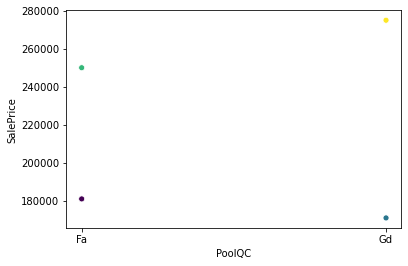

In [27]:
sns.scatterplot(x=train_df["PoolQC"], y=train_df["SalePrice"]) # 100000

In [28]:
# train_test["PoolQC"] = train_test["PoolQC"].fillna("None")
for col in ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]:
    train_test[col] = train_test[col].fillna("None")

In [29]:
object_col = train_test.columns[train_test.dtypes=='O']

In [30]:
num_col = train_test.columns[train_test.dtypes!='O']

In [31]:
for col in num_col:
    train_test[col].fillna(train_test[col].median(), inplace=True)

In [32]:
for col in object_col:
    train_test[col].fillna(train_test[col].mode()[0], inplace=True)

In [33]:
object_col


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [34]:
num_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'train'],
      dtype='object')

In [35]:
for col in num_col:
    skew_val = train_test[col].skew()
    if skew_val > 0.8 or skew_val < -0.8:
        train_test[col] = np.log1p(train_test[col])

In [36]:
train_test.skew().sort_values(ascending=False)

PoolArea         17.138488
3SsnPorch         9.051689
LowQualFinSF      8.782431
MiscVal           5.216675
BsmtHalfBath      3.794191
KitchenAbvGr      3.523867
ScreenPorch       2.939401
BsmtFinSF2        2.471427
EnclosedPorch     1.958097
TotRmsAbvGrd      0.727827
Fireplaces        0.727556
LotFrontage       0.707357
HalfBath          0.696367
TotalBsmtSF       0.670240
BsmtFullBath      0.620391
OverallCond       0.569351
MasVnrArea        0.537187
2ndFlrSF          0.307582
BedroomAbvGr      0.257939
MSSubClass        0.244684
GarageArea        0.222945
SalePrice         0.208416
MoSold            0.197322
OverallQual       0.184744
FullBath          0.164049
WoodDeckSF        0.157299
YrSold            0.130620
1stFlrSF          0.027161
train             0.007572
OpenPorchSF      -0.040966
GrLivArea        -0.051710
GarageCars       -0.215948
GarageYrBlt      -0.396898
YearRemodAdd     -0.448550
YearBuilt        -0.599677
BsmtFinSF1       -0.615642
LotArea          -0.627354
B

In [37]:
train_test["PoolArea"].dtypes

dtype('float64')

In [38]:
"PoolArea" in num_col

True

In [39]:
train_test['TotalSF']=train_test['TotalBsmtSF']+ train_test['1stFlrSF']+ train_test['2ndFlrSF']
train_test['TotalBath'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) + train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))
train_test['TotalPorchSF'] = train_test['OpenPorchSF'] + train_test['3SsnPorch'] + train_test['EnclosedPorch'] + train_test['ScreenPorch']+ train_test['WoodDeckSF']

In [40]:
train_test = pd.get_dummies(data=train_test)

In [41]:
train_df = train_test[train_test["train"] == 1]
test_df = train_test[train_test["train"] == 0]

In [42]:
del train_test

In [43]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

In [44]:
train_df["SalePrice"]

0       2.583824
1       2.573300
2       2.589054
3       2.553297
4       2.597433
5       2.554946
6       2.612611
7       2.580677
8       2.547453
9       2.539904
10      2.547212
11      2.621134
12      2.555487
13      2.605704
14      2.562177
15      2.548708
16      2.558135
17      2.518307
18      2.563153
19      2.552739
20      2.616849
21      2.552963
22      2.591205
23      2.547453
24      2.560688
25      2.599284
26      2.550347
27      2.612372
28      2.583461
29      2.496061
30      2.450717
31      2.558316
32      2.572625
33      2.566236
34      2.605174
35      2.613087
36      2.556025
37      2.560184
38      2.533626
39      2.510776
40      2.563636
41      2.568294
42      2.555487
43      2.547664
44      2.553851
45      2.615625
46      2.594291
47      2.597344
48      2.536483
49      2.545684
50      2.571383
51      2.537526
52      2.534351
53      2.629079
54      2.547513
56      2.569413
57      2.579339
58      2.638468
59      2.5443

In [45]:
y_train = train_df["SalePrice"]


In [46]:
train_df.drop(["SalePrice"], inplace=True, axis=1)

In [47]:
mmsl = MinMaxScaler()
le=LabelEncoder()

In [48]:
object_col = train_df.columns[train_df.dtypes=="O"]

In [49]:
object_col

Index([], dtype='object')

In [50]:
for col in object_col:
    print(col)
    train_df[col] = le.fit_transform(train_df[col])

In [52]:
for col in train_df.columns:
    train_df[col] = le.fit_transform(train_df[col])

In [53]:
for col in test_df.columns:
    test_df[col] = le.fit_transform(test_df[col])

In [56]:
x_train, x_val, y_train, y_val = train_test_split(train_df, y_train, test_size=0.2, random_state=45)

In [ ]:
test_df.drop(["SalePrice"], axis=1, inplace=True)

In [75]:
XGB_model = XGBRegressor( n_estimators=3000, 
                          learning_rate=0.01,
                          max_depth=4,
                         colsample_bytree=0.5,
                          min_child_weight=1, 
                          criterion='mse', ).fit(x_train,y_train)

[01:06:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [76]:
inter_res = XGB_model.predict(x_val)

In [77]:
print(np.sqrt(mean_squared_error(y_val, inter_res)))

0.009819546497596216


In [78]:
XGB_model.score(x_val, y_val)

0.8953783280239891

In [79]:
sub_df["SalePrice"]  = np.expm1(XGB_model.predict(test_df))

In [84]:
sub_df.to_csv("new_exp_with_xgboost_old_model_param.csv", index=False)

In [81]:
sub_df["SalePrice"] = np.expm1(sub_df["SalePrice"])

In [85]:
sub_df

,Id,SalePrice
0,1461,126393.570312
1,1462,159013.750000
2,1463,177899.000000
3,1464,182044.500000
4,1465,178820.421875
5,1466,169290.156250
6,1467,180839.468750
7,1468,169295.312500
8,1469,183626.515625
9,1470,125585.171875


In [86]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    "learning_rate": [0.005, 0.01,0.04,0.08],
    "n_estimators": [1000,2000,2500,3000],
    "max_depth": [3,4,5],
    "min_child_weight": [1, 2],
    "colsample_bytree": [0.3,0.4,0.5]
}
ggscv = GridSearchCV(estimator=XGB_model, param_grid=param_grid, cv=5,scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
ggscv.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.3min


In [ ]:
ggscv.best_params_